In [1]:
'''
MSSV: 21110429
Tên: Nguyễn Quang Trường
Bài Thực Hành Tuần 3
Lớp: 20TH_KDL
'''

'\nMSSV: 21110429\nTên: Nguyễn Quang Trường\nBài Thực Hành Tuần 3\nLớp: 20TH_KDL\n'

# Bài Tuần 3 Sự Tương Đồng Và Các Khoảng Cách (tt)

## Câu 1: Khoảng cách thay đổi (edit_distance)

In [1]:
def find_minimum_edit_distance (source_string, target_string) :

    # Create a dp matrix of dimension (source_string + 1) x (destination matrix + 1)
    dp = [[0] * (len(source_string) + 1) for i in range (len(target_string) + 1)]

    # Initialize the required values of the matrix

    for i in range(1, len(target_string) + 1) :
        dp[i][0] = dp[i - 1][0] + 1

    for i in range(1, len(source_string) + 1) :
        dp[0][i] = dp[0][i - 1] +1

    # Maintain the record of opertions done
    # Record is one tuple. Eg : (INSERT, 'a') or (SUBSTITUTE, 'e', 'r') or (DELETE, 'j')
    operations_performed = []

    # Build the matrix following the algorithm
    for i in range(1, len(target_string) + 1) :
        for j in range(1, len(source_string) + 1) :
            if source_string[j - 1] == target_string[i - 1] :
                dp[i][j] = dp[i-1][j-1]
            else :
                dp[i][j] = min(dp[i - 1][j] + 1, \
                                dp[i-1][j-1] + 2, \
                                dp[i][j-1]+ 1)

    # Initialization for backtracking
    i = len(target_string)
    j = len(source_string)

    # Backtrack to record the operation performed

    while (i != 0 and j != 0) :
        # If the character of the source string is equal to the character of the destination string,
        # no operation is performed

        if target_string[i - 1] == source_string[j - 1] :
            i-=1
            j-=1
        else :
            # Check if the current element is derived from the upper-left diagonal element
            if dp[i][j] == dp[i-1][j-1] + 2 :
                operations_performed.append(('SUBSTITUTE', source_string[j - 1], target_string[i - 1]))
                i-=1
                j-=1
            # Check if the current element is derived from the upper element
            elif dp[i][j] == dp[i - 1][j] + 1 :
                operations_performed.append(('INSERT', target_string[i - 1]))
                i-=1
            # Check if the current element is derived from the left element
            else :

                operations_performed.append(('DELETE', source_string[j - 1]))
                j-=1
    # If we reach top-most row of the matrix

    while (j != 0) :
        operations_performed.append(('DELETE', source_string[j - 1]))
        j-=1

    # If we reach left-most column of the matrix

    while (i !=0) :
        operations_performed.append(('INSERT', target_string[i - 1]))
        i-=1

    # Reverse the list of operations performed as we have operations in reverse
    # order because of backtracking

    operations_performed.reverse()
    return [dp[len(target_string)][len(source_string)], operations_performed]

if __name__=="__main__":

    # Get the source and target string
    print("Enter the source string :")
    source_string = input().strip()
    print("Enter the target string :")
    target_string = input().strip()

    # Find the minimum edit distance and the operation performed
    distance, operations_performed = find_minimum_edit_distance(source_string, target_string)

    # Count the number of individual operations
    insertions, deletions, substitutions = 0, 0, 0
    for i in operations_performed :
        if i[0] == 'INSERT' :
            insertions += 1
        elif i[0] == 'DELETE' :
            deletions += 1
        else :
            substitutions += 1

# Print the results
print("Minimum edit distance : {}".format(distance))
print("Number of insertions : {}".format(insertions))
print("Number of deletions : {}".format(deletions))
print("Number of substitutions : {}".format(substitutions))
print("Total number of operations : {}".format(insertions + deletions + substitutions))

print("Actual Operations :")
for i in range(len(operations_performed)) :
    
    if operations_performed[i] [0] == 'INSERT' :
        print("{}) {} : {}".format(i + 1, operations_performed[i][0], operations_performed[i][1]))
    elif operations_performed[i][0] == 'DELETE' :
        print("{}) {} : {}".format(i + 1, operations_performed[i][0], operations_performed[i][1]))
    else :
        print("{}) {} : {} by {}".format(i+1, operations_performed[i][0], operations_performed[i][1], operations_performed[i][2]))





Enter the source string :
INTENTION
Enter the target string :
EXCECTION
Minimum edit distance : 8
Number of insertions : 0
Number of deletions : 0
Number of substitutions : 4
Total number of operations : 4
Actual Operations :
1) SUBSTITUTE : I by E
2) SUBSTITUTE : N by X
3) SUBSTITUTE : T by C
4) SUBSTITUTE : N by C


### Nhận xét thuật toán

Thuật toán trên là Wagner-Fisher là một thuật toán quy hoạch động để tính toán edit distance giữa hai chuỗi ký tự. 
Thuật toán này sử dụng một bảng hai chiều (hay còn gọi là ma trận) để lưu trữ các giá trị edit distance cho các phần của hai chuỗi.

Các bước thực hiện thuật toán Wagner-Fisher như sau:

1) Khởi tạo ma trận: Tạo một ma trận có (m+1) hàng và (n+1) cột, trong đó m và n lần lượt là độ dài của hai chuỗi ký tự. Các phần tử của hàng và cột đầu tiên được khởi tạo với các giá trị từ 0 đến m và n tương ứng.

2) Tính toán giá trị các phần tử còn lại của ma trận: Với mỗi phần tử của ma trận, giá trị tại đó được tính dựa trên giá trị của các phần tử xung quanh và độ khác biệt giữa hai ký tự tương ứng. Cụ thể, với mỗi phần tử (i,j) trong ma trận, ta tính giá trị của nó bằng cách:
 - Nếu ký tự cuối cùng của A tại vị trí i bằng ký tự cuối cùng của B tại vị trí j, thì giá trị của phần tử (i,j) bằng giá trị của phần tử (i-1,j-1).
 - Nếu không, giá trị của phần tử (i,j) được tính bằng giá trị của phần tử (i-1,j-1) cộng với độ khác biệt giữa hai ký tự tương ứng. Độ khác biệt có thể là 1 (nếu ta thực hiện thao tác thay thế), hoặc là 2 (nếu ta thực hiện thao tác thêm và thao tác xóa). Giá trị của phần tử (i,j) cũng có thể được tính bằng giá trị của phần tử (i-1,j) cộng với 1 (nếu ta thực hiện thao tác xóa) hoặc giá trị của phần tử (i,j-1) cộng với 1 (nếu ta thực hiện thao tác thêm).

3) Trả về giá trị edit distance: Giá trị edit distance giữa hai chuỗi ký tự được tính bằng giá trị của phần tử cuối cùng trong ma trận.

Độ phức tạp thời gian của thuật toán Wagner-Fisher là O(mn), trong đó m và n lần lượt là độ dài của hai chuỗi ký tự.



#### Edit distance có ứng dụng rộng trong nhiều lĩnh vực, như xử lý ngôn ngữ tự nhiên, so sánh văn bản, nhận diện giọng nói và đánh giá độ tương đồng giữa hai chuỗi dữ liệu. Việc áp dụng thuật toán Wagner-Fisher sẽ giúp cho các ứng dụng này có thể xử lý và phân tích dữ liệu một cách nhanh chóng và chính xác.





## Câu 2:  Khoảng cách dãy con chung dài nhất (Longest Common Subsequence_ LCSS)

Longest Common Subsequence (chuỗi con chung dài nhất), đây là một trong những thuật toán quan trọng trong lĩnh vực xử lý chuỗi và so sánh chuỗi.

LCSS là một thuật toán cho phép tìm ra chuỗi con chung dài nhất giữa hai chuỗi. Để làm được điều này, thuật toán tìm tất cả các chuỗi con của hai chuỗi đầu vào, sau đó so sánh chúng để tìm ra chuỗi con chung dài nhất. Các chuỗi con này có thể không liên tiếp nhau, nhưng vẫn phải có thứ tự xuất hiện giống nhau trong cả hai chuỗi.

Ứng dụng của thuật toán LCSS rất rộng rãi, chẳng hạn như trong xử lý ngôn ngữ tự nhiên, phân tích DNA, so sánh chuỗi âm nhạc và nhiều lĩnh vực khác.

In [1]:
import numpy as np
import pandas as pd

In [35]:
def find_LCSS(string_1, string_2):
    
    # Create a ss matrix of dimension (len(string_1) + 1) x (len(string_2) + 1)
    ss=[[0]*(len(string_2)+1) for i in range(len(string_1)+1)]
    
    #Create a pre_pos matrix of dimension (len(string_1)+1)x(len(string_2)+1) in order to 
    # save the position of the arrow in the previous cell
    pre_pos=[[0]*(len(string_2)+1) for i in range(len(string_1)+1)]
    
    
    #Buil Algorithm
    for i in range(1,len(string_1)+1):
        for j in range(1,len(string_2)+1):
            
            if string_1[i-1]==string_2[j-1]:
                ss[i][j]=ss[i-1][j-1]+1;
                pre_pos[i][j]=[i-1,j-1]
            else:
                ss[i][j]=max(ss[i][j-1],ss[i-1][j])
                if ss[i-1][j]>=ss[i][j-1]:
                    pre_pos[i][j]=[i-1,j]
                else:
                    pre_pos[i][j]=[i,j-1]
                    
    #vet[] save street backtrack in matrix                
    vet=[]
    
    #LCSS save char into Longest Common Subsequence
    LCSS=[]
    
    #operations_performed record direction of movement to a position in the matrix 
    # ex: ("UP",[0,1]): remove up cell i=0,j=1
    operations_performed=[]

    
    #Backtrack
    i=len(string_1)
    j=len(string_2)
    vet.append([[len(string_1),len(string_2)]])
    
    while (i!=0 and j!=0):
        a,b=pre_pos[i][j]
        
        #Save path of algorithm on matrix
        vet.append([pre_pos[i][j]])
        
        # Check if the current element is derived from the upper-left diagonal element
        if (a==i-1 and b==j-1):
            LCSS.append(string_1[i-1])
            operations_performed.append(("DIAGON",[a,b]))
            
        # Check if the current element is derived from the upper element
        elif (a==i-1 and b==j):
            operations_performed.append(('UP',[a,b]))
            
        # Check if the current element is derived from the left element    
        else:
            operations_performed.append(("LEFT",[a,b]))
        i=a
        j=b
        
        
    #We don't care that both i and j are 0 because when one of them is zero we can't find the cell [i-1][j-1]
    
    
    lcss=''
    LCSS.reverse()
    for i in range(len(LCSS)):
        lcss=lcss+LCSS[i]
        
    return [ss[len(string_1)][len(string_2)],operations_performed,lcss,vet,ss]





                
                

In [36]:
if __name__=="__main__":

    # Get the string_1 and string_2
    print("Enter the  string 1 :")
    string_1 = input().strip()
    print("Enter the target string 2 :")
    string_2 = input().strip()
    
    # Find distance, operations performed , LCSS, path of LCSS, matrix perform
    distance,operations_performed, LCSS,street,ss=find_LCSS(string_1,string_2)
    
    print("Distance Longest Common Subsequence: {}".format(distance))
    print("Longest Common Subsequence LCSS: {}".format(LCSS))
    
    print("Moves in the matrix:")
    for i in range(len(operations_performed)):
        print("{}) : {} ->{}".format(i+1,operations_performed[i][0],operations_performed[i][1]))
    print("Table algorithm:")
    print(pd.DataFrame(ss))
    print("Algorithm path by matrix:")
    for i in range(len(street)):
        print("->{} ".format(street[i]),end="")
        

Enter the  string 1 :
ACADB
Enter the target string 2 :
CBDA
Distance Longest Common Subsequence: 2
Longest Common Subsequence LCSS: CA
Moves in the matrix:
1) : UP ->[4, 4]
2) : UP ->[3, 4]
3) : DIAGON ->[2, 3]
4) : LEFT ->[2, 2]
5) : LEFT ->[2, 1]
6) : DIAGON ->[1, 0]
Table algorithm:
   0  1  2  3  4
0  0  0  0  0  0
1  0  0  0  0  1
2  0  1  1  1  1
3  0  1  1  1  2
4  0  1  1  2  2
5  0  1  2  2  2
Algorithm path by matrix:
->[[5, 4]] ->[[4, 4]] ->[[3, 4]] ->[[2, 3]] ->[[2, 2]] ->[[2, 1]] ->[[1, 0]] 

### Các Bước Thuật Toán

**Bước 1: Chuẩn bị đầu vào**    
 - Nhập vào hai chuỗi cần so sánh, chúng ta gọi là chuỗi A và chuỗi B.
 - Lưu độ dài của hai chuỗi này thành m và n tương ứng.

**Bước 2: Khởi tạo ma trận**
 - Tạo một ma trận có kích thước (m + 1) x (n + 1) để lưu trữ kết quả của các bước con của thuật toán.
 - Khởi tạo các giá trị ban đầu của ma trận là 0.
 
**Bước 3: Xử lý từng ký tự**
 - Sử dụng vòng lặp for để duyệt qua từng ký tự của chuỗi A và chuỗi B.
 - So sánh ký tự tại vị trí i của chuỗi A với ký tự tại vị trí j của chuỗi B.
 
**Bước 4: Tính toán ma trận LCSS**
 - Nếu ký tự tại vị trí i của chuỗi A và ký tự tại vị trí j của chuỗi B giống nhau, tức là A[i] == B[j], thì gán giá trị của ma trận tại vị trí (i, j) bằng giá trị tại vị trí (i-1, j-1) tại bước trước đó cộng thêm 1. Đó là, LCSS[i][j] = LCSS[i-1][j-1] + 1.
 
 - Nếu ký tự tại vị trí i của chuỗi A và ký tự tại vị trí j của chuỗi B không giống nhau, tức là A[i] != B[j], thì gán giá trị của ma trận tại vị trí (i, j) bằng max((i-1,j),(i,j-1)).
 
**Bước 5: Lưu giá trị LCSS lớn nhất**
   - Trong quá trình tính toán ma trận, lưu giá trị lớn nhất của LCSS và vị trí của nó trong ma trận. Chẳng hạn, giả sử giá trị lớn nhất của LCSS là maxLen và vị trí của nó là (maxLen_i, maxLen_j).
   
**Bước 6: Truy vết kết quả**

 - Bắt đầu từ vị trí (maxLen_i, maxLen_j), duyệt lại ngược lại trong ma trận LCSS để thu được chuỗi con dài nhất chung giữa chuỗi A và chuỗi B.
 - Khi duyệt lại ngược lại trong ma trận LCSS, nếu gặp giá trị LCSS tại vị trí (i, j) là 0, thì dừng lại vì đó là điểm kết thúc của chuỗi con LCSS

### Giải thích theo code LCSS:

+ ss: khởi tạo ma trận có kích thước (m+1)x(n+1) tương ứng chiều hai dài chuỗi 


+ pre_pos: khởi tạo ma trận có kích thước (m+1)x(n+1) tương ứng chiều hai dài chuỗi để lưu lại vị trí mũi tên của ô trước 


+ Tiếp đến dùng for để duyệt qua từng ký tự trong hai chuỗi A,B và tính toán ma trận LCSS:
    $$
         LCSS(i,j)= max \begin{cases}
                                               LCSS(i-1,j-1), x_i=y_i\\
                                               LCSS(i-1,j), 𝑜𝑡ℎ𝑒𝑟𝑤𝑖𝑠𝑒 (𝑛𝑜 \  𝑚𝑎𝑡𝑐ℎ \ 𝑜𝑛 \  𝑥_i)\\
                                               LCSS(i-1,j-1), 𝑜𝑡ℎ𝑒𝑟𝑤𝑖𝑠𝑒 (𝑛𝑜 \  𝑚𝑎𝑡𝑐ℎ\  𝑜𝑛\  𝑦_i)
                                               \end{cases}
    $$
    
    
    - IF A[i]=B[i]: LCSS=LCSS[i-1][j-1]+1
    - ELSE: LCSS=max(LCSS[i-1][j], LCSS[i,j-1])
    
    
+ vet: để lưu lại đường đi của quay lui của thuật toán


+ Quay lui lại để tìm LSCC, bắt đầu tại i=n+1, j=m+1, sau đó nhờ vào pre_pos để biết rằng ô tiếp theo cần đi là ô nào.Và ta cần lưu lại vị trí khi đường đi theo ô trên bên trái lưu vào LCSS. Ta chỉ cần dừng khi một trong hai biến i hoặc j bằng 0, vì khi i hoặc j bằng 0 ta không ta không thể có được ô trên bên trái nữa vì mục tiêu ta quan tâm là thuật toán đi lên trên bên trái.

## Câu 3 Khoảng cách biến đổi thời gian động (Dynamic Time Warping _DTW)

Khoảng cách biến đổi thời gian động (Dynamic Time Warping - DTW) là một thuật toán được sử dụng để đo độ tương đồng giữa hai chuỗi dữ liệu thời gian có độ dài khác nhau. Thuật toán này được sử dụng rộng rãi trong lĩnh vực xử lý tín hiệu và nhận dạng mẫu để so sánh và phân tích các tín hiệu có độ biến động về thời gian khác nhau.

Trong DTW, hai chuỗi dữ liệu được biểu diễn dưới dạng hai chuỗi vector với các giá trị tại các thời điểm khác nhau. Việc so sánh hai chuỗi này bằng cách tìm đường đi tối ưu (optimal path) trên một ma trận khoảng cách (distance matrix) giữa các điểm trong hai chuỗi. Đường đi tối ưu này được tìm bằng cách đánh giá khoảng cách giữa từng cặp điểm của hai chuỗi và tìm đường đi với khoảng cách tổng thấp nhất.

Vì hai chuỗi có thể có độ dài khác nhau, nên một số điểm trong chuỗi dài hơn có thể không có điểm tương ứng trong chuỗi ngắn hơn. Do đó, để giải quyết vấn đề này, DTW cho phép thêm hoặc xoá các điểm trong chuỗi dài hơn để phù hợp với chuỗi ngắn hơn.

DTW là một trong những phương pháp phổ biến để so sánh và phân tích các tín hiệu thời gian và đã được sử dụng trong nhiều lĩnh vực như xử lý tiếng nói, nhận dạng khuôn mặt, phân tích dữ liệu y tế, và nhiều lĩnh vực khác.

In [2]:
import numpy as np
import pandas as pd

In [42]:
def find_Warping_DWT(seris_1,seris_2):
        
    # Create a ss matrix of dimension len(seris_1) x len(seris_2)
    dist_time=[[0]*(len(seris_2)) for i in range(len(seris_1))]
    
    #Build Algrorithm
    for i in range(len(seris_1)):
        for j in range(len(seris_2)):
            if (i==0 and j==0):
                dist_time[i][j]=abs(seris_1[i]-seris_2[j])
            elif (i==0):
                dist_time[i][j]=abs(seris_1[i]-seris_2[j])+ dist_time[i][j-1]
            elif (j==0):
                dist_time[i][j]=abs(seris_1[i]-seris_2[j])+ dist_time[i-1][j]
            else:
                dist_time[i][j]=abs(seris_1[i]-seris_2[j])+ min(dist_time[i][j-1],dist_time[i-1][j],dist_time[i-1][j-1])
    
    #Save path warping of algorithm
    wraping=[]
    
    #Save position of min([i-1][j], [i][j-1],[i-1][j-1]) in order to backtrack
    vet=[]
    
    
    i=len(seris_1)-1
    j=len(seris_2)-1
    vet.append([i,j])
    wraping.append(dist_time[i][j])
    
    while(i!=0 and j!=0):
        dist_min=min(dist_time[i-1][j],dist_time[i][j-1],dist_time[i-1][j-1])
        wraping.append(dist_min)
        if (dist_min==dist_time[i-1][j]) :
            i=i-1
            vet.append([i,j])
        elif (dist_min==dist_time[i][j-1]):
            j=j-1
            vet.append([i,j])
        else:
            i=i-1
            j=j-1
            vet.append([i,j])
    
    # If we reach left-most column of the matrix
    while (i !=0):
        wraping.append(dist_time[i-1][j])
        i=i-1
        vet.append([i,j])
        
    # If we reach top-most row of the matrix
    while (j !=0):
        wraping.append(dist_time[i][j-1])
        j=j-1
        vet.append([i,j])
        
        
        
    return [wraping,vet,pd.DataFrame(dist_time)]

#### Các bước thuật toán DTW:


**Bước 1: Chuẩn bị dữ liệu**
- Nhập vào hai chuỗi thời gian cần so sánh: chuỗi Q và chuỗi C.
- Chuỗi Q và C có thể có độ dài khác nhau.

**Bước 2: Khởi tạo ma trận**
- Tạo một ma trận có kích thước mxn, trong đó m và n lần lượt là độ dài của chuỗi Q và C.

**Bước 3: Tính toán khoảng cách**
- Dùng vòng lặp duyệt qua các cặp điểm (i,j) của ma trận.
- Tại mỗi điểm (i,j), tính toán khoảng cách giữa hai điểm Q[i] và C[j].
  $$ 
            DWT(i,j)=distance(x_i,y_j) + min \begin{cases}
                                               DWT(i,j-1)\\
                                               DWT(i-1,j)\\
                                               DWT(i-1,j-1)
                                               \end{cases}
        $$

- Lưu kết quả vào ma trận DTW.

**Bước 4: Tìm đường đi tối ưu**
- Duyệt đường đi tối ưu từ  (điểm DTW[m][n]) đến góc (điểm DTW[0][0]).
- Tìm min((i-1,j),(i,j-1),(i-1,j-1)) trên ma trận DTW
- Đường đi tối ưu là đường đi có tổng khoảng cách biến đổi thời gian động nhỏ nhất giữa hai chuỗi Q và C.
- Lưu đường đi tối ưu vào một danh sách các cặp điểm (i,j) trên ma trận DTW.



In [43]:
if __name__=="__main__":

    # Get the seris_1 and seris_2
    print("Enter the  seris_1 :")
    seris_1 = input().split()
    print("Enter the target seris_2 :")
    seris_2 = input().split()
    
    seris_1 = [int(i) for i in seris_1]  # chuyển đổi các giá trị thành số nguyên
    seris_2 = [int(i) for i in seris_2]  # chuyển đổi các giá trị thành số nguyên

    wraping,street, matrix_dist=find_Warping_DWT(seris_1,seris_2)
    
    #out put result 
    
    print("Wraping Sequence: {}".format(wraping))
    print("Path Weaping: {}".format(street))
    print("Matrix of algorithm:")
    print(matrix_dist)
    

Enter the  seris_1 :
1 7 4 8 2 9 6 5 2 0
Enter the target seris_2 :
1 2 8 5 5 1 9 4 6 5
Wraping Sequence: [17, 12, 9, 9, 9, 7, 7, 6, 3, 2, 1, 0]
Path Weaping: [[9, 9], [8, 9], [7, 9], [6, 8], [6, 7], [5, 6], [4, 5], [3, 4], [2, 3], [1, 2], [0, 1], [0, 0]]
Matrix of algorithm:
    0   1   2   3   4   5   6   7   8   9
0   0   1   8  12  16  16  24  27  32  36
1   6   5   2   4   6  12  14  17  18  20
2   9   7   6   3   4   7  12  12  14  15
3  16  13   6   6   6  11   8  12  14  17
4  17  13  12   9   9   7  14  10  14  17
5  25  20  13  13  13  15   7  12  13  17
6  30  24  15  14  14  18  10   9   9  10
7  34  27  18  14  14  18  14  10  10   9
8  35  27  24  17  17  15  21  12  14  12
9  36  29  32  22  22  16  24  16  18  17



###### visualization


In [44]:
x=[i for i in range(1,len(seris_1)+1)]

In [45]:
a1=[street[i][0] for i in range(len(street))]
a2=[street[i][1] for i in range(len(street))]

In [46]:
import matplotlib.pyplot as plt

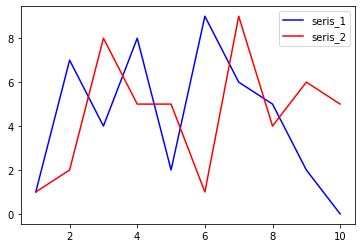

In [47]:
x1=[i for i in range(1,len(seris_1)+1)]
x2=[i for i in range(1,len(seris_2)+1)]

plt.plot(x1,seris_1,'blue',label="seris_1")
plt.plot(x2,seris_2,'red',label="seris_2")
plt.legend()



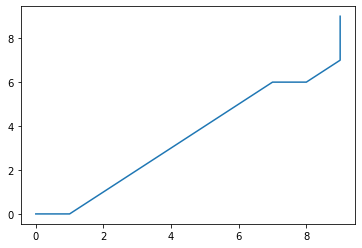

In [48]:
#path of algorithm
plt.plot(a2,a1)